<a href="https://colab.research.google.com/github/VJalili/MSPC/blob/benchmark/Benchmark/PlotBenchmarkings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_context("paper")

In [ ]:
df = pd.read_csv("benchmarking_results.tsv", sep="\t")
df_replicates = pd.read_csv("benchmarking_results_replicates.tsv", sep="\t")

In [ ]:
df

,mspc_version,experiment_id,replicate_count,interval_count,runtime_seconds,peak_physical_memory_usage_bytes,peak_paged_memory_usage_bytes,peak_virtual_memory_usage_bytes
0,v2.1,ENCSR000BNU,2,18573,1.008059,44933120,37289984,183336960
1,v2.1,ENCSR000EFR,2,600000,3.501384,72560640,65654784,217939968
2,v2.1,ENCSR000EGD,2,10834,0.794680,43245568,35016704,165838848
3,v2.1,ENCSR000EGJ,2,600000,3.544179,72511488,66162688,217939968
4,v2.1,ENCSR000EGL,2,600000,3.243759,73588736,67121152,217939968
...,...,...,...,...,...,...,...,...
139,v5.5.0,ENCSR908CMW,2,600000,9.920540,215388160,181923840,2204071256064
140,v5.5.0,ENCSR914NEI,2,44805,3.022518,103391232,68603904,2204072173568
141,v5.5.0,ENCSR931HNY,2,600000,9.532760,215715840,181911552,2204071256064
142,v5.5.0,ENCSR987PBI,2,1667,0.652432,65130496,27033600,2204071370752


In [ ]:
versions_groups = df.groupby("mspc_version")
len(versions_groups)

3

In [ ]:
releases = {}
for release in versions_groups.groups:
  g = versions_groups.get_group(release)
  g_ = g.copy()
  g_ = g_.drop('mspc_version', axis=1)
  releases[release] = g_

In [ ]:
def get_increase_percentage(pre_val, cur_val):
  return ((cur_val - pre_val) / abs(pre_val)) * 100

In [ ]:
changes = []
odf = releases["v5.5.0"]
for idx, row in releases["v1.1"].iterrows():
  other = odf.loc[(odf["interval_count"] == row["interval_count"]) & (odf["replicate_count"] == row["replicate_count"])]
  if len(other) == 1:
    changes.append({
        "experiment_id": row["experiment_id"],
        "replicate_count": row["replicate_count"],
        "interval_count": row["interval_count"],
        "runtime_change_percent": get_increase_percentage(other["runtime_seconds"].to_list()[0], row["runtime_seconds"]),
        "peak_physical_memory_usage_change_percent": get_increase_percentage(other["peak_physical_memory_usage_bytes"].to_list()[0], row["peak_physical_memory_usage_bytes"]),
        "peak_paged_memory_usage_change_percent": get_increase_percentage(other["peak_paged_memory_usage_bytes"].to_list()[0], row["peak_paged_memory_usage_bytes"]),
        "peak_virtual_memory_usage_change_percent": get_increase_percentage(other["peak_virtual_memory_usage_bytes"].to_list()[0], row["peak_virtual_memory_usage_bytes"])
    })
  elif len(other) == 0:
    print("Could not find a match; interval count " + str(row["interval_count"]) + ", and replicate count "+ str(row["replicate_count"]))
    continue
  else:
    print("More than one match found; interval count " + str(row["interval_count"]) + ", and replicate count " + str(row["replicate_count"]))
    continue

More than one match found; interval count 600000, and replicate count 2
More than one match found; interval count 600000, and replicate count 2
More than one match found; interval count 600000, and replicate count 2
More than one match found; interval count 600000, and replicate count 2
More than one match found; interval count 600000, and replicate count 2
More than one match found; interval count 600000, and replicate count 2
More than one match found; interval count 600000, and replicate count 2
More than one match found; interval count 600000, and replicate count 2
More than one match found; interval count 600000, and replicate count 2
More than one match found; interval count 600000, and replicate count 2
More than one match found; interval count 600000, and replicate count 2
More than one match found; interval count 600000, and replicate count 2
More than one match found; interval count 600000, and replicate count 2
More than one match found; interval count 600000, and replicate 

In [ ]:
len(changes)

19

In [ ]:
changes_df = pd.DataFrame(changes)

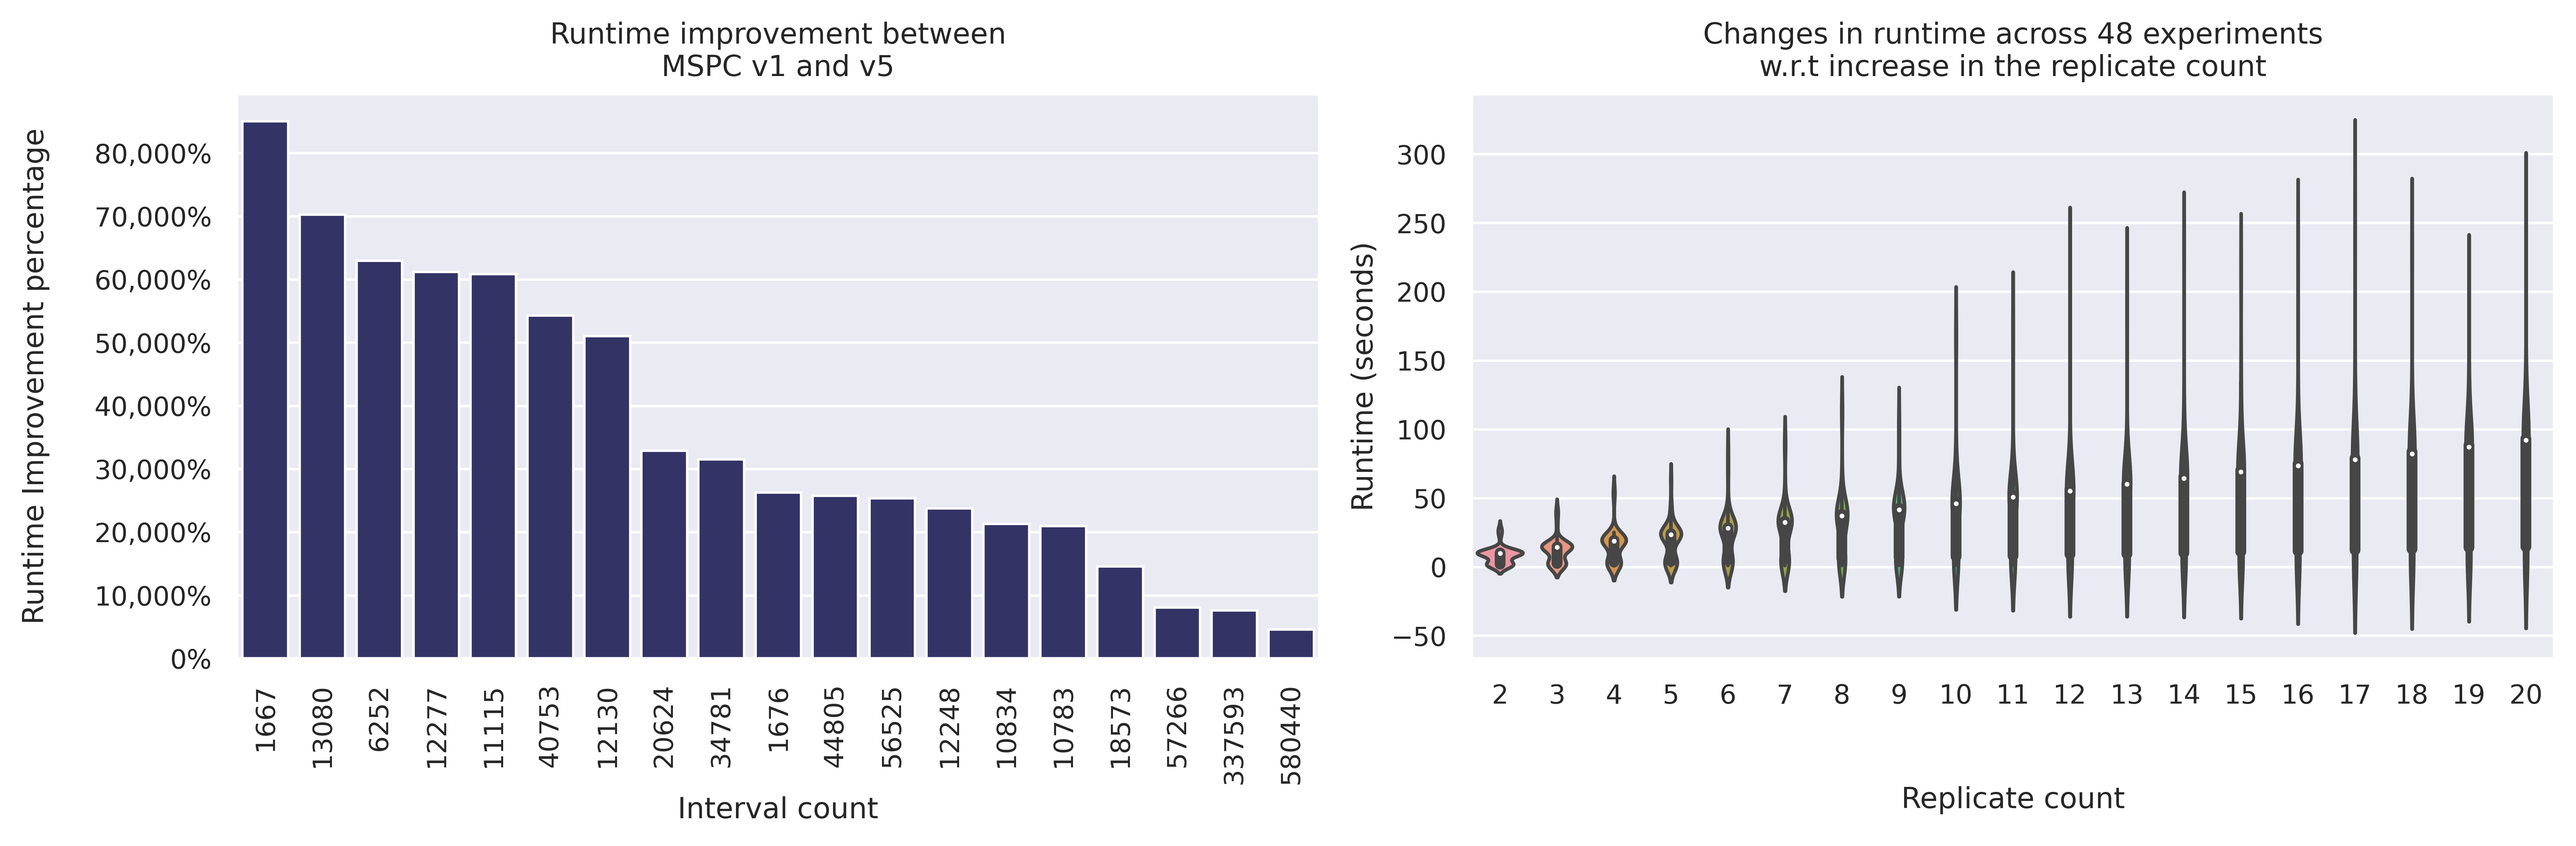

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
fig.set_dpi(600)


changes_df.sort_values("runtime_change_percent", ascending=False, inplace=True)
sns.barplot(data=changes_df, x="interval_count", y="runtime_change_percent", order=changes_df["interval_count"], facecolor=(0.2, 0.2, 0.4, 1), ax=ax[0])
ax[0].set(xlabel="Interval count", ylabel="Runtime Improvement percentage\n")
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',') + "%"))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].title.set_text("Runtime improvement between\nMSPC v1 and v5")


sns.violinplot(x=df_replicates["replicate_count"], y=df_replicates["runtime_seconds"], ax=ax[1])
ax[1].set(xlabel="\n\nReplicate count", ylabel="Runtime (seconds)")
ax[1].title.set_text("Changes in runtime across 48 experiments\nw.r.t increase in the replicate count")

plt.tight_layout()
plt.savefig('benchmarks.png')